In [1]:
import random
import logging

import rich

import networkx

In [2]:
from twon_lss.simulations.bcm import (
    Simulation,
    SimulationArgs,
    Ranker,
    Agent,
)

from twon_lss.schemas import Post, User, Feed, Network

In [3]:
logging.getLogger().setLevel(logging.DEBUG)

In [4]:
NUM_AGENTS: int = 10
NUM_NEIGHBORS: int = 9

ARGS = SimulationArgs(num_steps=10, num_posts_to_interact_with=1)

In [5]:
RANKER = Ranker()
rich.print(RANKER)

Ranker(
    args=RankerArgs(weights=RankerInterfaceWeights(network=1.0, individual=1.0), noise=Noise(low=0.8, high=1.2)),
    type='random'
)

In [6]:
USERS = [User() for _ in range(NUM_AGENTS)]
rich.print(USERS[:5])

[
    User(id='user-d6ab6dd7-477e-4f79-9ff2-a9091f3e8d3d'),
    User(id='user-de57639a-46ee-4342-90f4-724f14f24ad3'),
    User(id='user-0e0d08b5-7a4a-4d11-acc2-00bd34dfe7e4'),
    User(id='user-f8b62346-e52b-4aa5-8d54-2926960a0390'),
    User(id='user-c6607deb-c2e3-4a53-8376-3b24c9186b1c')
]

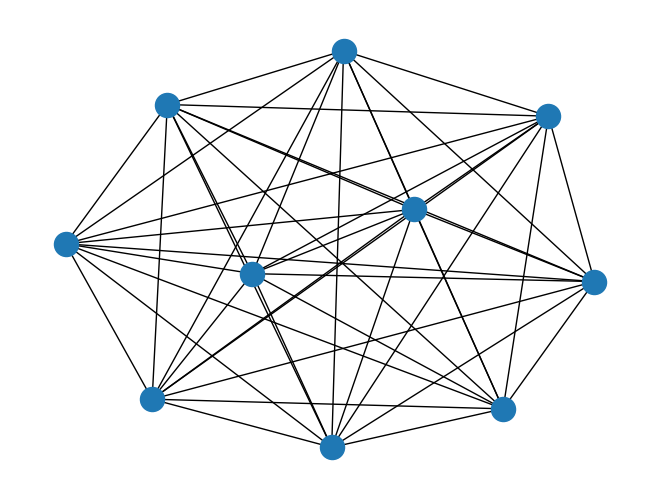

In [7]:
NETWORK = Network.from_graph(networkx.random_regular_graph(NUM_NEIGHBORS, len(USERS)), USERS)
networkx.draw(NETWORK.root)

In [8]:
FEED = Feed(
    [
        Post(user=user, content=str(random.uniform(-1.0, 1.0)))
        for user in USERS
    ]
)
rich.print(FEED[:3])

[
    Post(
        user=User(id='user-d6ab6dd7-477e-4f79-9ff2-a9091f3e8d3d'),
        content='0.21075014054896934',
        reads=[],
        likes=[],
        id='post-a1a83112-f114-492a-9dc8-4e028e38511e',
        timestamp=0
    ),
    Post(
        user=User(id='user-de57639a-46ee-4342-90f4-724f14f24ad3'),
        content='-0.20182500897042033',
        reads=[],
        likes=[],
        id='post-285eb793-3a6d-4ea3-87ea-ed72d94b66c7',
        timestamp=0
    ),
    Post(
        user=User(id='user-0e0d08b5-7a4a-4d11-acc2-00bd34dfe7e4'),
        content='0.4398997029900642',
        reads=[],
        likes=[],
        id='post-9c117132-b8bc-4d42-a31f-487dec18d1d0',
        timestamp=0
    )
]

In [9]:
INDIVIDUALS = {
    user: Agent(
        memory=[float(post.content)],
        eps=0.8,
        delta=0.1,
    )
    for user, post in zip(
        USERS, FEED.root, strict=False
    )
}
rich.print(INDIVIDUALS.get(USERS[0]))

Agent(eps=0.8, delta=0.1, memory=[0.21075014054896934], memory_length=4)

In [10]:
simulation = Simulation(
    args=ARGS,
    ranker=RANKER,
    individuals=INDIVIDUALS,
    network=NETWORK,
    feed=FEED,
)

DEBUG:root:>f init simulation


In [11]:
simulation()

Output()

DEBUG:root:>f simulate step n=0
DEBUG:root:10
DEBUG:root:90


DEBUG:root:>i len(user_feed)=9
DEBUG:root:>i len(user_feed)=9
DEBUG:root:>i len(user_feed)=9
DEBUG:root:>i len(user_feed)=9
DEBUG:root:>i len(user_feed)=9
DEBUG:root:>i len(user_feed)=9
DEBUG:root:>i len(user_feed)=9
DEBUG:root:>i len(user_feed)=9
DEBUG:root:>i len(user_feed)=9
DEBUG:root:>i len(user_feed)=9
DEBUG:root:>f simulate step n=1
DEBUG:root:10
DEBUG:root:0


DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>f simulate step n=2
DEBUG:root:0
DEBUG:root:0


DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>f simulate step n=3
DEBUG:root:0
DEBUG:root:0


DEBUG:root:>i len(user_feed)=0


DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>f simulate step n=4
DEBUG:root:0
DEBUG:root:0


DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>f simulate step n=5
DEBUG:root:0
DEBUG:root:0


DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>f simulate step n=6
DEBUG:root:0
DEBUG:root:0


DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>f simulate step n=7
DEBUG:root:0
DEBUG:root:0


DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0


DEBUG:root:>f simulate step n=8
DEBUG:root:0
DEBUG:root:0


DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>f simulate step n=9
DEBUG:root:0
DEBUG:root:0


DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
DEBUG:root:>i len(user_feed)=0
